In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [3]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): eta = h_pd['h']/data_['A']
	else: eta = data_['h']/data_['A']
	if a==None: a,b=0,1
	E=0
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5):
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		E+=sum((a*t[i]+b)*N_t*phi_t)
	return E

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

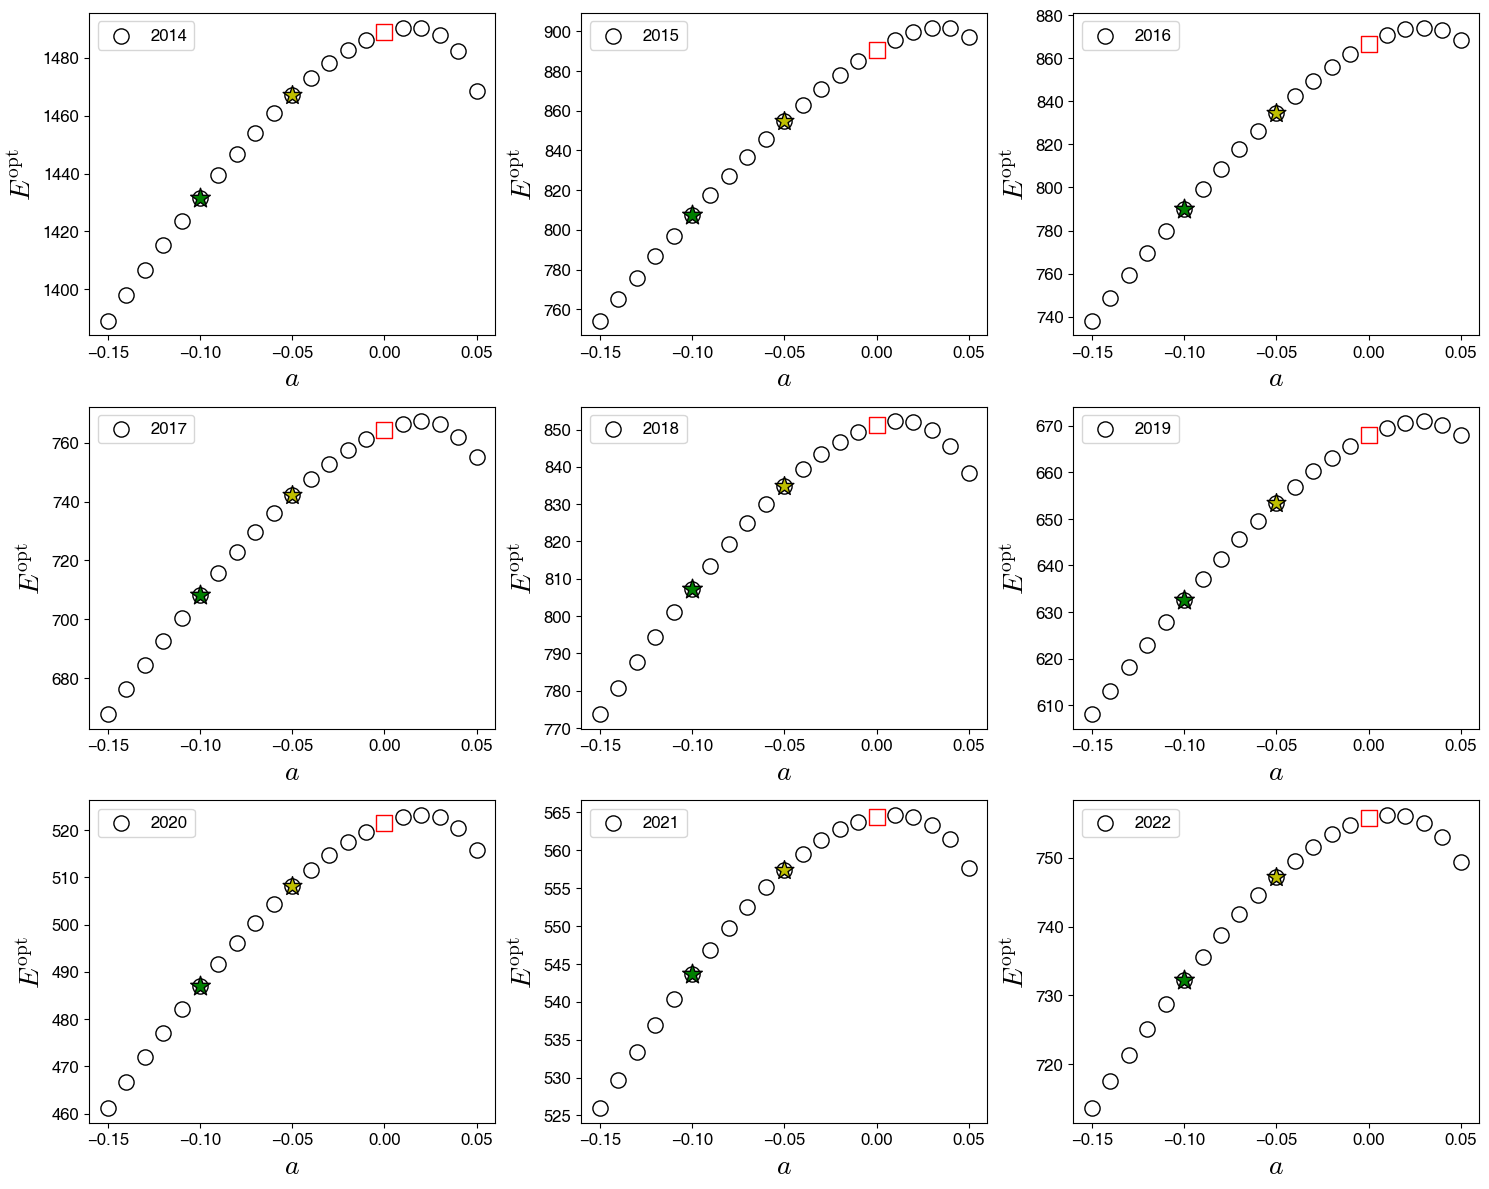

In [ ]:
save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c=0
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		# h_opt = pd.read_csv(save_path+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')
		# E_list.append(E(data, h_pd=h_opt))

		ai+=1
	ax = fig.add_subplot(gs[c//3, c%3])
	# ax.plot(np.linspace(-0.15,0.05,21), [E(data)]*21, 'r--')
	ax.scatter(np.linspace(-0.15,0.05,21), E_list, ec='k', s=120, c='w') #label=str(year)
	ax.scatter(np.linspace(-0.15,0.05,21)[15], E_list[15], marker='s', ec='r',s=120,c='w')
	ax.scatter(np.linspace(-0.15,0.05,21)[10], E_list[10], marker='*', ec='k',s=200,c='y')
	ax.scatter(np.linspace(-0.15,0.05,21)[5], E_list[5], marker='*', ec='k',s=220,c='g')
	# ax.set_ylim(E(data)-500,E(data)+50)
	# ax.set_yscale('log')
	ax.set_xlabel(r'$a$',size=20)
	ax.set_ylabel(r'$E^\mathrm{opt}$',size=20)
	ax.tick_params(axis='x', labelsize=12)
	ax.tick_params(axis='y', labelsize=12)
	# ax.legend(fontsize='large')
	c+=1
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/E_a.pdf',format='pdf',transparent=True)

plt.show()

In [28]:
np.linspace(-0.15, 0.05, 21)[5]

-0.09999999999999999

In [32]:
E(data)

884.5090909090516

In [34]:
b(data,a=0)

1.0

In [35]:
a = -0.1
b_ = b(data, a)

In [38]:
t = [45, 55, 65, 75, 85]
for tt in t:
    print(a*tt+b_)

4.286206306925315
3.2862063069253153
2.2862063069253153
1.2862063069253153
0.28620630692531535


In [40]:
a = -0.05
b_ = b(data, a)

In [41]:
t = [45, 55, 65, 75, 85]
for tt in t:
    print(a*tt+b_)

2.6431031534626577
2.1431031534626577
1.6431031534626577
1.1431031534626577
0.6431031534626577


In [5]:
data

,sido,sigungu,A,N,D,h,RN0_9,RN10_19,RN20_29,RN30_39,...,RD60_69,RD70_79,RD80_,eta_tilde,eta_tilde40_49,eta_tilde50_59,eta_tilde60_69,eta_tilde70_79,eta_tilde80_,h_opt_age
0,Seoul,강남구,39.501308,71.0,6.0,3,0.000292,0.009054,0.052862,0.075643,...,0.129353,0.189055,0.562189,0.030736,0.021390,0.024234,0.026381,0.029826,0.053371,3
1,Seoul,강동구,24.589280,126.0,6.0,3,0.000292,0.009054,0.052862,0.075643,...,0.129353,0.189055,0.562189,0.040073,0.029583,0.032907,0.035338,0.039105,0.061106,3
2,Seoul,강북구,23.596920,98.0,12.0,1,0.000292,0.009054,0.052862,0.075643,...,0.129353,0.189055,0.562189,0.020180,0.013328,0.015337,0.016897,0.019480,0.040279,1
3,Seoul,강서구,41.436729,167.0,12.0,4,0.000292,0.009054,0.052862,0.075643,...,0.129353,0.189055,0.562189,0.036661,0.026001,0.029287,0.031744,0.035641,0.060898,4
4,Seoul,관악구,29.568727,152.0,5.0,1,0.000292,0.009054,0.052862,0.075643,...,0.129353,0.189055,0.562189,0.009905,0.007525,0.008294,0.008848,0.009691,0.014291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Gyeongnam,진주시,712.957223,102.0,13.0,4,0.001925,0.009625,0.034649,0.049086,...,0.109091,0.172727,0.609091,0.002723,0.001253,0.002373,0.002078,0.002488,0.004601,4
120,Gyeongnam,창원시,747.673362,208.0,26.0,12,0.001925,0.009625,0.034649,0.049086,...,0.109091,0.172727,0.609091,0.007718,0.003569,0.006734,0.005901,0.007058,0.012957,12
121,Gyeongnam,통영시,239.815884,55.0,4.0,1,0.001925,0.009625,0.034649,0.049086,...,0.109091,0.172727,0.609091,0.001591,0.000828,0.001426,0.001279,0.001481,0.002342,1
122,Jeju,서귀포시,978.426995,149.0,12.0,1,0.000000,0.015306,0.020408,0.086735,...,0.066667,0.333333,0.400000,0.000406,0.000327,0.000341,0.000297,0.000517,0.000597,1


In [6]:
E(data)

884.5090909090516